In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"iris.csv")
df.head()

sepal.length  sepal.width  petal.length  petal.width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
Species         0
dtype: int64

<Axes: >

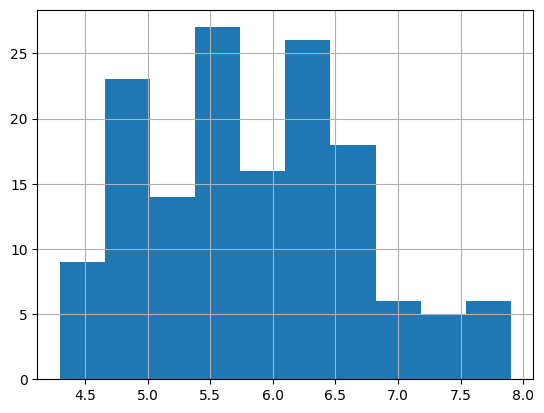

In [7]:
df['sepal.length'].hist()

<Axes: >

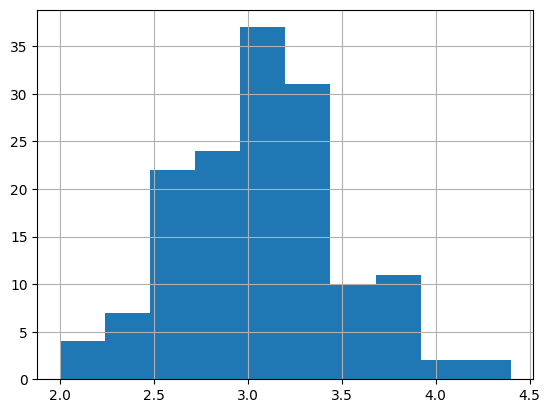

In [8]:
df['sepal.width'].hist()

<Axes: >

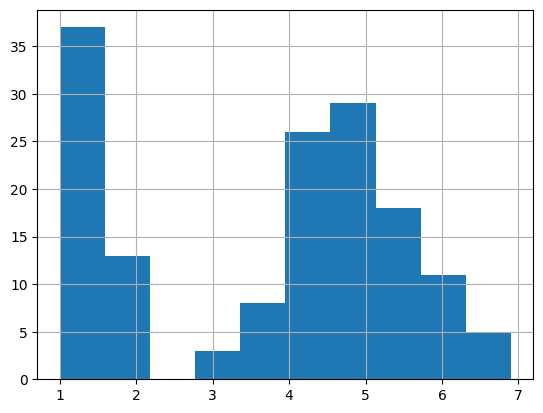

In [9]:
df['petal.length'].hist()

<Axes: >

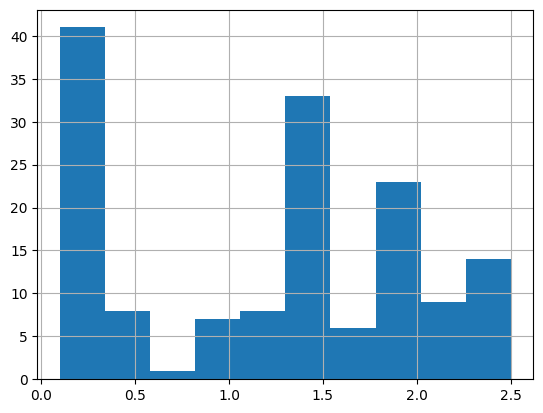

In [10]:
df['petal.width'].hist()

In [11]:
colors=['red','orange','blue']
species = ['virginica','versicolor','setosa']

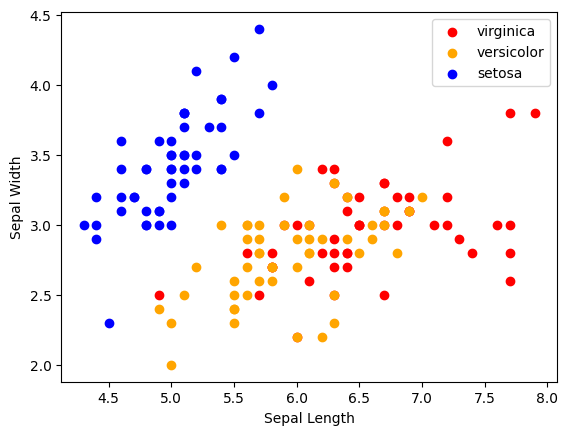

In [12]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['sepal.length'],x['sepal.width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

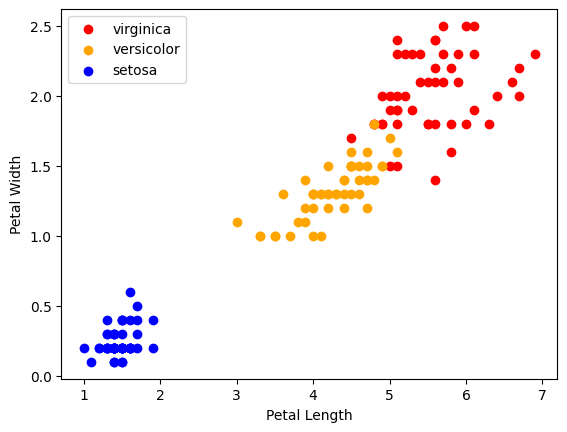

In [13]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['petal.length'],x['petal.width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [14]:
df1 = pd.read_csv("iris.csv")
df1 = df.drop('Species',axis=1)
df1.corr()


sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000

<Axes: >

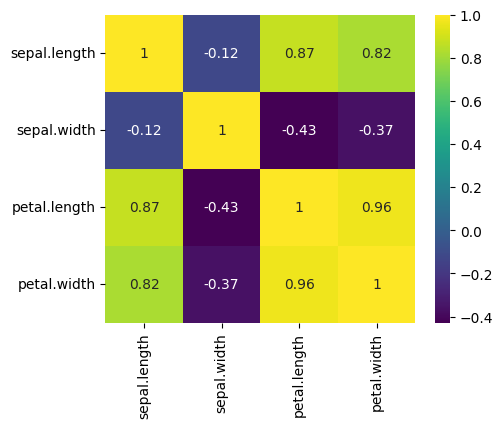

In [15]:
x = df1.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x,annot=True,ax=ax,cmap= 'viridis')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle 
X = df1
Y = df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  95.55555555555556


In [18]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [19]:
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  95.55555555555556


In [20]:
model = KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  95.55555555555556


In [21]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [22]:
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  95.55555555555556


In [23]:
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  93.33333333333333


In [24]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [25]:
print("% Accuracy: ", model.score(x_test,y_test)*100)

% Accuracy:  93.33333333333333


In [26]:
import pickle 
filename = "Model3.sav"
pickle.dump(model,open(filename,'wb'))

In [27]:
import pickle

In [28]:
filename = "Model3.sav"
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully


In [29]:
load_model = pickle.load(open(filename,'rb'))

In [30]:
load_model.predict([[5.8,1,2.1,1.2]])

array(['setosa'], dtype=object)

In [31]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [32]:
x_test.head()

sepal.length  sepal.width  petal.length  petal.width
24            4.8          3.4           1.9          0.2
91            6.1          3.0           4.6          1.4
95            5.7          3.0           4.2          1.2
39            5.1          3.4           1.5          0.2
102           7.1          3.0           5.9          2.1

In [33]:
load_model.predict([[4,3,1,5]])

array(['setosa'], dtype=object)